- In this notebook, we understand the basic concepts of hypothesis testing using example of differene of mean
- Example:
    - Suppose we conducted experiment under two different conditions or factors (actually one fixed and one experimental)
    - We measure mean of some response varaible
    - Now, we want to assess whether we have different mean response or same mean response i.e. does the factor affect the mean response or not

In [1]:
from __future__ import print_function, division, absolute_import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


** Data **
- let, $y_{11}, y_{12}, ....., y_{1n_{1}}$ be the set of $n_{1}$ observation from experiment conducted on factor 1
- let, $y_{21}, y_{22}, ....., y_{2n_{2}}$ be the set of $n_{2}$ observation from experiment conducted on factor 2


* Assumption: Two sample are draw at random form two different normal populations

---------------------------------------

** Model for Data **

$\large y_{ij} = \mu_{i} + \epsilon_{ij} \huge\{^{i = 1,2}_{j = 1, 2, 3, .... , n_{i}}$, where 


$y_{ij}$ j the observation for factor i


$\mu_{i}$ mean response for factor i


$\epsilon_{ij}$ random error associated with i,j the observation

* Assumption: $\large \epsilon_{ij} \sim NID(0,\sigma^{2}_{i})$      
    - Above implies, $\large y_{ij} \sim NID(\mu_{i}, \sigma^{2}_{i})$
    
---------------

** Statistical Hypothesis ** 

    - A statement either about probability distribution or the parameters of the model
    - In above case it would be 
$$ \large H_{0}: \mu_{1} = \mu_{2}$$

$$ \large H_{1}: \mu_{1} \neq \mu_{2}$$

---------

**Steps**
- Take random sample
- Define an appropriate test-statistics and compute it
    - if we assume varaince of two population are same, then for difference of mean it would be

$$\large t = \frac{\bar{y_{1}} - \bar{y_{2}}}{S_{p}\sqrt{\frac{1}{n_{1}} + \frac{1}{n_{2}}}}$$, where

$$S_{p}^{2} = \frac{ (n_{1} - 1)S_{1}^{2} + (n_{2} - 1)S_{2}^{2}}{n_{1} + n_{2} - 2 }$$

- Specifiy a **critical value** for test-statistics which leads to rejection of $H_{0}$
    - leads to definition of $\alpha$
- Depending upon the value of test statistics we either reject $H_{0}$ or fail to 

In [22]:
def calculate_t_test_statistics(y1, y2):
    n1 = len(y1)
    n2 = len(y2)
    
    y1_bar = np.mean(y1)
    y2_bar = np.mean(y2)
    
    S1 = np.std(y1)
    S2 = np.std(y2)
    
    Sp = np.sqrt(((n1 - 1)*S1**2 + (n2 - 1)*S2**2) / (n1 + n2 - 2))
    
    t = (y1_bar - y2_bar) / (Sp*np.sqrt(1/n1 + 1/n2))
    
    return t

In [26]:
# calculate t-stat when samples are from same population
np.random.seed(100)
y1 = np.random.normal(loc=100, scale=10, size=100)
y2 = np.random.normal(loc=100, scale=10, size=50)
print("Calculated t-stats {}".format(calculate_t_test_statistics(y1, y2)))
print("Scipy t-stats {}".format(st.ttest_ind(y1, y2)[0]))

Calculated t-stats 1.03139242237
Scipy t-stats 1.02429685446


In [31]:
# calculate t-stat when two samples are from slightly different population
np.random.seed(100)
y1 = np.random.normal(loc=100, scale=10, size=100)
y2 = np.random.normal(loc=105, scale=10, size=50)
print("Calculated t-stats {}".format(calculate_t_test_statistics(y1, y2)))
print("Scipy t-stats {}".format(st.ttest_ind(y1, y2)[0]))

Calculated t-stats -1.86020683022
Scipy t-stats -1.84740935023


In [27]:
# calculate t-stat when two samples are from slightly different population
np.random.seed(100)
y1 = np.random.normal(loc=100, scale=10, size=100)
y2 = np.random.normal(loc=110, scale=10, size=50)
print("Calculated t-stats {}".format(calculate_t_test_statistics(y1, y2)))
print("Scipy t-stats {}".format(st.ttest_ind(y1, y2)[0]))

Calculated t-stats -4.7518060828
Scipy t-stats -4.71911555493


In [32]:
# calculate t-stat when two samples are from slightly different population
np.random.seed(100)
y1 = np.random.normal(loc=100, scale=10, size=100)
y2 = np.random.normal(loc=115, scale=10, size=50)
print("Calculated t-stats {}".format(calculate_t_test_statistics(y1, y2)))
print("Scipy t-stats {}".format(st.ttest_ind(y1, y2)[0]))

Calculated t-stats -7.64340533539
Scipy t-stats -7.59082175962


In [30]:
# calculate t-stat when two samples are from slightly different population
np.random.seed(100)
y1 = np.random.normal(loc=100, scale=10, size=100)
y2 = np.random.normal(loc=90, scale=10, size=50)
print("Calculated t-stats {}".format(calculate_t_test_statistics(y1, y2)))
print("Scipy t-stats {}".format(st.ttest_ind(y1, y2)[0]))

Calculated t-stats 6.81459092754
Scipy t-stats 6.76770926386


-----------------------
- We can observe, as actual difference between the mean increases, t-stats increases as well
- Hence, we can conculde that higher value of t-stats indicate that two samples have different mean
- t-stats can keep increasing, so we have to come-up with a cut-off such that $t-stats \geq t-critical$, indicate two samples have difference mean
- Value of $test-critical$ or in this case $t-critical$ depends on experiments and what we are trying to conclude, but in most of the cases, its that value below which all 95% of the distribution is covered

----------

In [61]:
def plot_t_distribution(dof=10):
    # lets look at how t-distribution 
    x = np.linspace(st.t.ppf( 0.01, df=dof), st.t.ppf(0.99, df=dof), 200)
    x_025 = st.t.ppf(0.025, df =dof)
    pdf_025= st.t.pdf(x_025, df=dof)

    x_975 = st.t.ppf(0.975, df=dof)
    pdf_975= st.t.pdf(x_975, df=dof)
    pdf = st.t.pdf(x, df=dof)
    m = st.t.stats(df=dof, moments='m')
    
    plt.figure(figsize=(20,5))
    plt.plot(x, pdf)
    plt.vlines(x_025, 0, pdf_025)
    plt.text(x_025,pdf_025 + 0.01, "t-critical lower {}".format(x_025) )
    plt.vlines(x_975, 0, pdf_975)
    plt.text(x_975,pdf_975 + 0.01, "t-critical upper {}".format(x_975) )
    plt.ylim(0, np.max(pdf)+0.01)
    plt.vlines(m, 0, np.max(pdf))
    plt.title("t distribution and t-critical for dof {}".format(dof))
    plt.xlim(-3,3)
    plt.show()



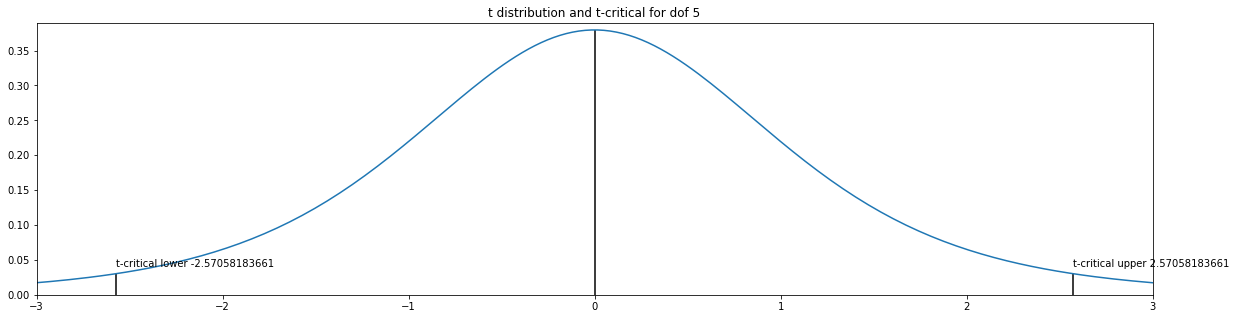

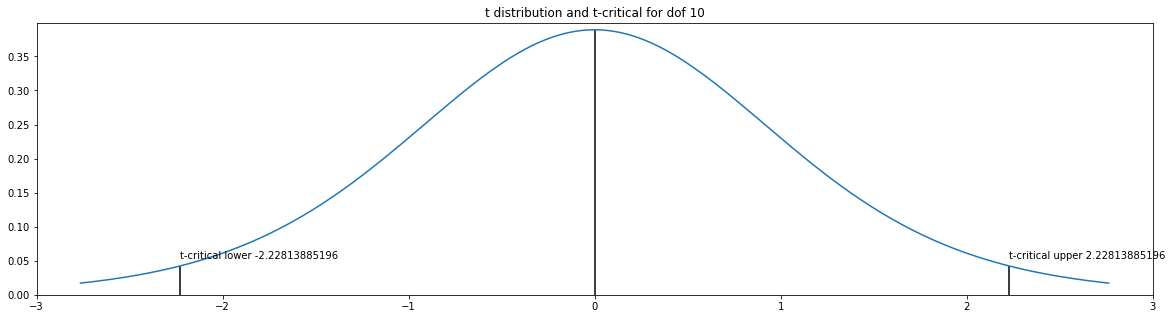

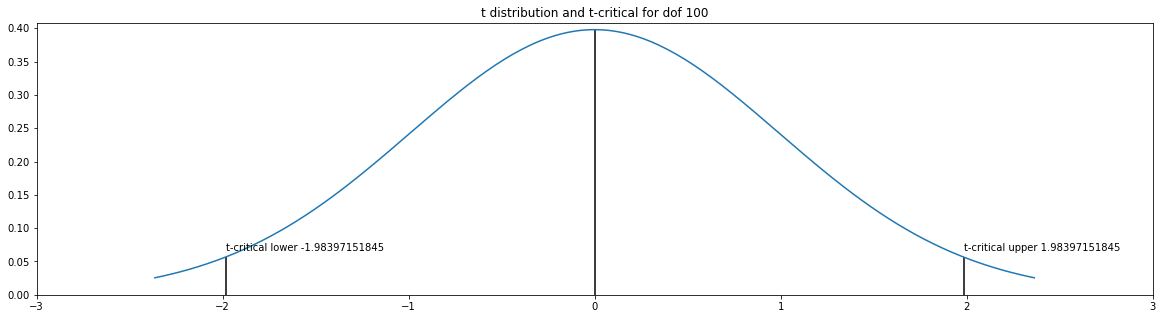

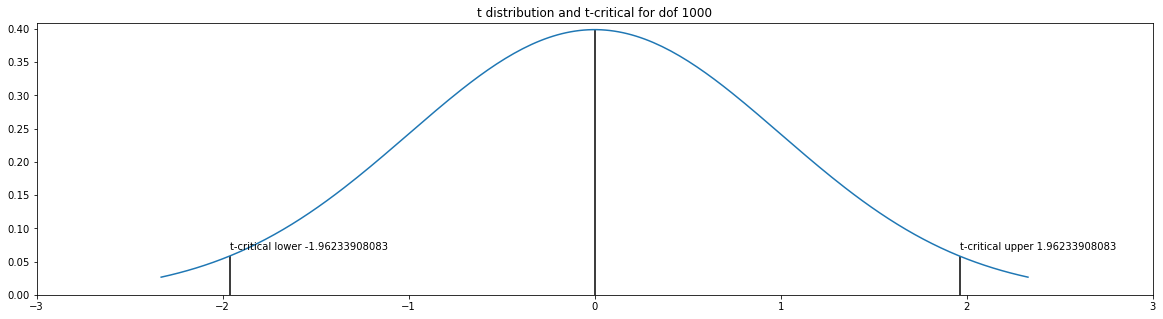

In [64]:
plot_t_distribution(5)
plot_t_distribution(10)
plot_t_distribution(100)
plot_t_distribution(1000)

In [72]:
st.norm.ppf(0.975)

1.959963984540054

----------------
- From plots above we can observe that t-distirbution is symetric (it looks like normal distribution) 
- Hence, we have two t-critical values, most symmetric distirbution will have two critical values
- Also, t-critical depends on degree of freedom, higher dof (or number of smaple) lower t-critical 
    - at dof=1000, $t-critical = 1.96 = Z_{0.975}(0,1)$ i.e. t-distribution has become similar to standard normal
    
------------

- So, when 
    - $|t-test| > t-critical\hspace{2mm} upper$, or 
    - $t-test < t-critical\hspace{2mm} lower$, or 
    - $t-test > t-critical\hspace{2mm} upper$
    we say that for the given data we can conclude that two samples have different mean i.e. we reject $H_{0}$
    ** Note, we never say that hypothesis is true or false we always make statement about data**

$\alpha = P(reject\hspace{1mm}H_{0}/ H_{0} is true)$

----------

Why 95% or $\alpha = 5%$?
    - because probability of anything occuring beyond 95% is two low and it can either occur by chance (but only 5% of the time) or when there is actual diffrence
    - however, this threshold is not writte in stone, and we will see subsequently that it might not be always good cut-off to use
    - in physics, a threshold of $\alpha = 0.00003$ is used
    

-------------------

What is $\alpha$ ? 
    - it's that value in the distribution beyond which we reject $H_{0}$ even if its true i.e. it's a False Positive Rate
    - Mathematically,
$$\alpha = P(reject\hspace{1mm}H_{0}/ H_{0} is true)$$

    - Or, its also called type 1 error rate, setting a value of 5% for alpha, implies that we will make wrong conclusion only 5% of the time in long run, if effect exsist
    
----------------

What is p-critical ?
    - The P-value is the probability that the test statistic will take on a value that is at least as
extreme as the observed value of the statistic when the null hypothesis H0 is true.
        - in case of t-stats, 
$$p-critical = t_{\alpha/2, dof}$$, or
$$p-critical = t_{1-\alpha/2, dof}$$
   


In [95]:
# p-critical
p_critical_lower = st.t.cdf(st.t.ppf(0.025, df=10), df=10)
p_critical_upper = 1-st.t.cdf(st.t.ppf(0.975, df=10), df=10)

print("p-critical, lower {}, upper {}".format(p_critical_lower, p_critical_upper))

p-critical, lower 0.0250000000009, upper 0.0250000000009


--------
- p-critical lower and p-critical upper are same 
- hence its better to use p-values for comparison then to use 2 values of t-critical
- therefore, we define p-value for the data, which is nothing but, probability of observing value as extreme as test-statistics when null hypothesis is true 
- if, $\large p-val \le p-critical = p-critical\hspace{1mm} lower + p-critical\hspace{1mm} upper = \alpha$, then reject null Hypothesis

In [103]:
def get_p_val_for_t_test(y1,y2, alpha=0.05):
    n1 = len(y1)
    n2 = len(y2)
    t_stat = calculate_t_test_statistics(y1,y2)
    dof = n1 + n2 - 2
    p_val_calculated = 2*(1- st.t.cdf(np.abs(t_stat), df=dof))
    # scipy multiplies the p-val by 2, to get the total probability
    p_val_scipy = st.ttest_ind(y1, y2)[1]
    p_critical = 2*(1-st.t.cdf(st.t.ppf(1-alpha/2, df=dof), df=dof))
    
    return p_val_calculated, p_val_scipy, p_critical
    

In [105]:
np.random.seed(100)
y1 = np.random.normal(loc=100, scale=10, size=100)
y2 = np.random.normal(loc=100, scale=10, size=100)
p_val_calculated, p_val_scipy, p_critical = get_p_val_for_t_test(y1, y2)
print(" P-val calculated {}\n P-val scipy {}\n P-critical {}".format(p_val_calculated, p_val_scipy, p_critical))

 P-val calculated 0.81398067967
 P-val scipy 0.814896031908
 P-critical 0.0500000000003


- p_val > p_critical, We can't reject hypothesis 


In [106]:
np.random.seed(100)
y1 = np.random.normal(loc=100, scale=10, size=100)
y2 = np.random.normal(loc=110, scale=10, size=100)
p_val_calculated, p_val_scipy, p_critical = get_p_val_for_t_test(y1, y2)
print(" P-val calculated {}\n P-val scipy {}\n P-critical {}".format(p_val_calculated, p_val_scipy, p_critical))

 P-val calculated 1.36213262891e-11
 P-val scipy 1.67810758657e-11
 P-critical 0.0500000000003


- p_val < p_critical, we can reject the null hypothesis
    - data has been generated from two population with different mean

------------

- mostly we say if p_val < 0.05, reject Null
- will this always give right results, lets use simulation to understand this

In [116]:
?plt.hist()

In [119]:
plt.rcParams["patch.force_edgecolor"] = True

In [123]:
def plot_p_values(effect_size=0, n1=100, n2=100, tot_iter=50000,alpha=0.05):
    mu1 = 100
    mu2 = mu1 + effect_size
    bins = np.linspace(0,1,1/alpha)
    p_val_all = []
    for i in range(tot_iter):
        y1 = np.random.normal(loc=mu1, scale=10, size=n1)
        y2 = np.random.normal(loc=mu2, scale=10, size=n2)
        
        p_val = st.ttest_ind(y1, y2)[1]
        p_val_all.append(p_val)
    

    plt.figure(figsize=(20,5))
    plt.hist(p_val_all, bins)
    plt.hlines(alpha*tot_iter, 0, 1)
    plt.xticks(bins)
    plt.xlabel('p-values')
    plt.ylabel("number of p-values")
    plt.title('p-value distrrbution')
    
    
        

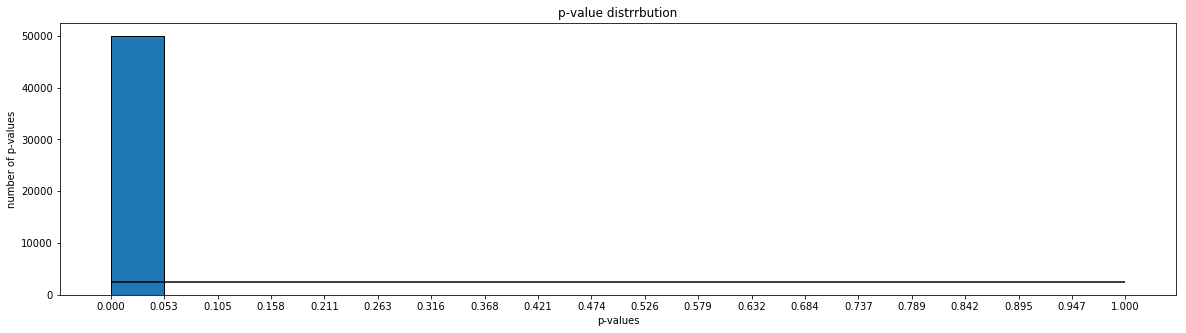

In [125]:
#plotting p-values for large effect size
plot_p_values(effect_size=10)

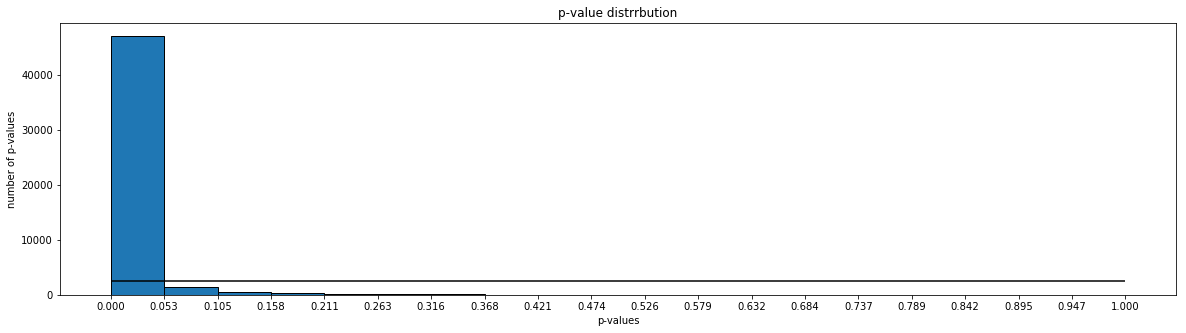

In [127]:
#plotting moderate effect size
plot_p_values(effect_size=5)

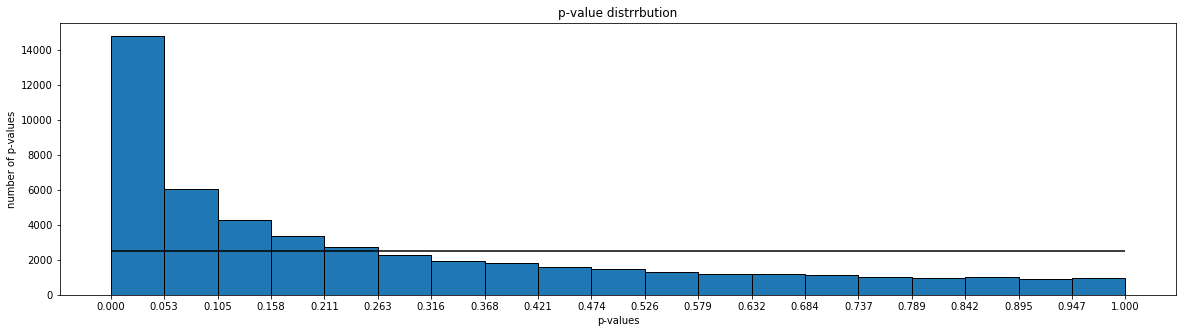

In [124]:
#plotting p-values for small effect size
plot_p_values(effect_size=2)

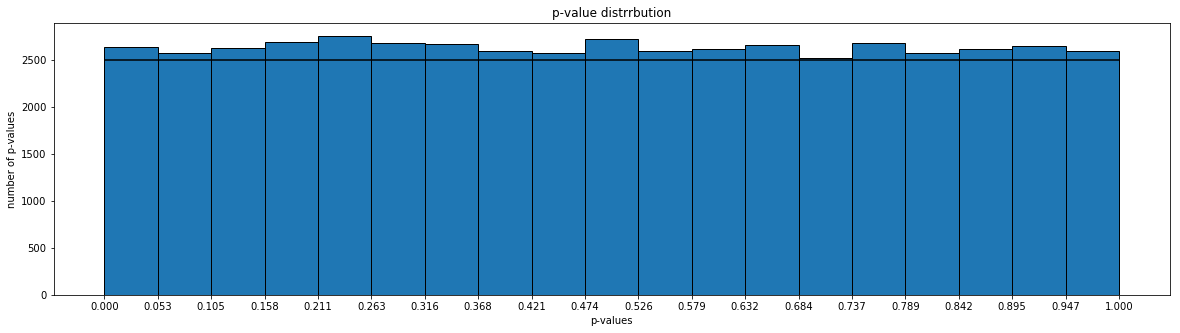

In [126]:
#plotting no effect size
plot_p_values()

-----------
- When effect size is large, most of the p-values are below 0.05, implying that we will never get wrong when effect size is large
- However, when there is no effect, all p-values are eqaully likely, thereby indicating that we might reject $H_{0}$ but that might not be correct

----------

- In next session, we will discuss this more into detail, along with the power of the test